In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.model import stepmodel, model

import geopandas as gpd
%matplotlib inline

PyTables is not installed. No support for HDF output.


In [2]:
training_folder = '../../'
input_folder = training_folder + r'inputs/'
plot_path = training_folder + 'outputs/plot/'

In [5]:
sm = stepmodel.read_zippedpickles(training_folder + 'models/base/walk_model')

zone_to_transit: 100%|██████████| 29/29 [00:00<00:00, 30.34it/s]          


In [6]:
sm = sm.change_epsg(epsg=3857, coordinates_unit='meter')

Reprojecting model from epsg 3857 to epsg 3857: 100%|██████████| 29/29 [00:03<00:00,  8.49it/s]


# plot

In [7]:
from syspy.spatial import spatial
from syspy.syspy_utils.data_visualization import add_basemap
url = 'http://a.basemaps.cartocdn.com/light_nolabels/tileZ/tileX/tileY.png'
a, b = spatial.zone_clusters(sm.zones, n_clusters=25)

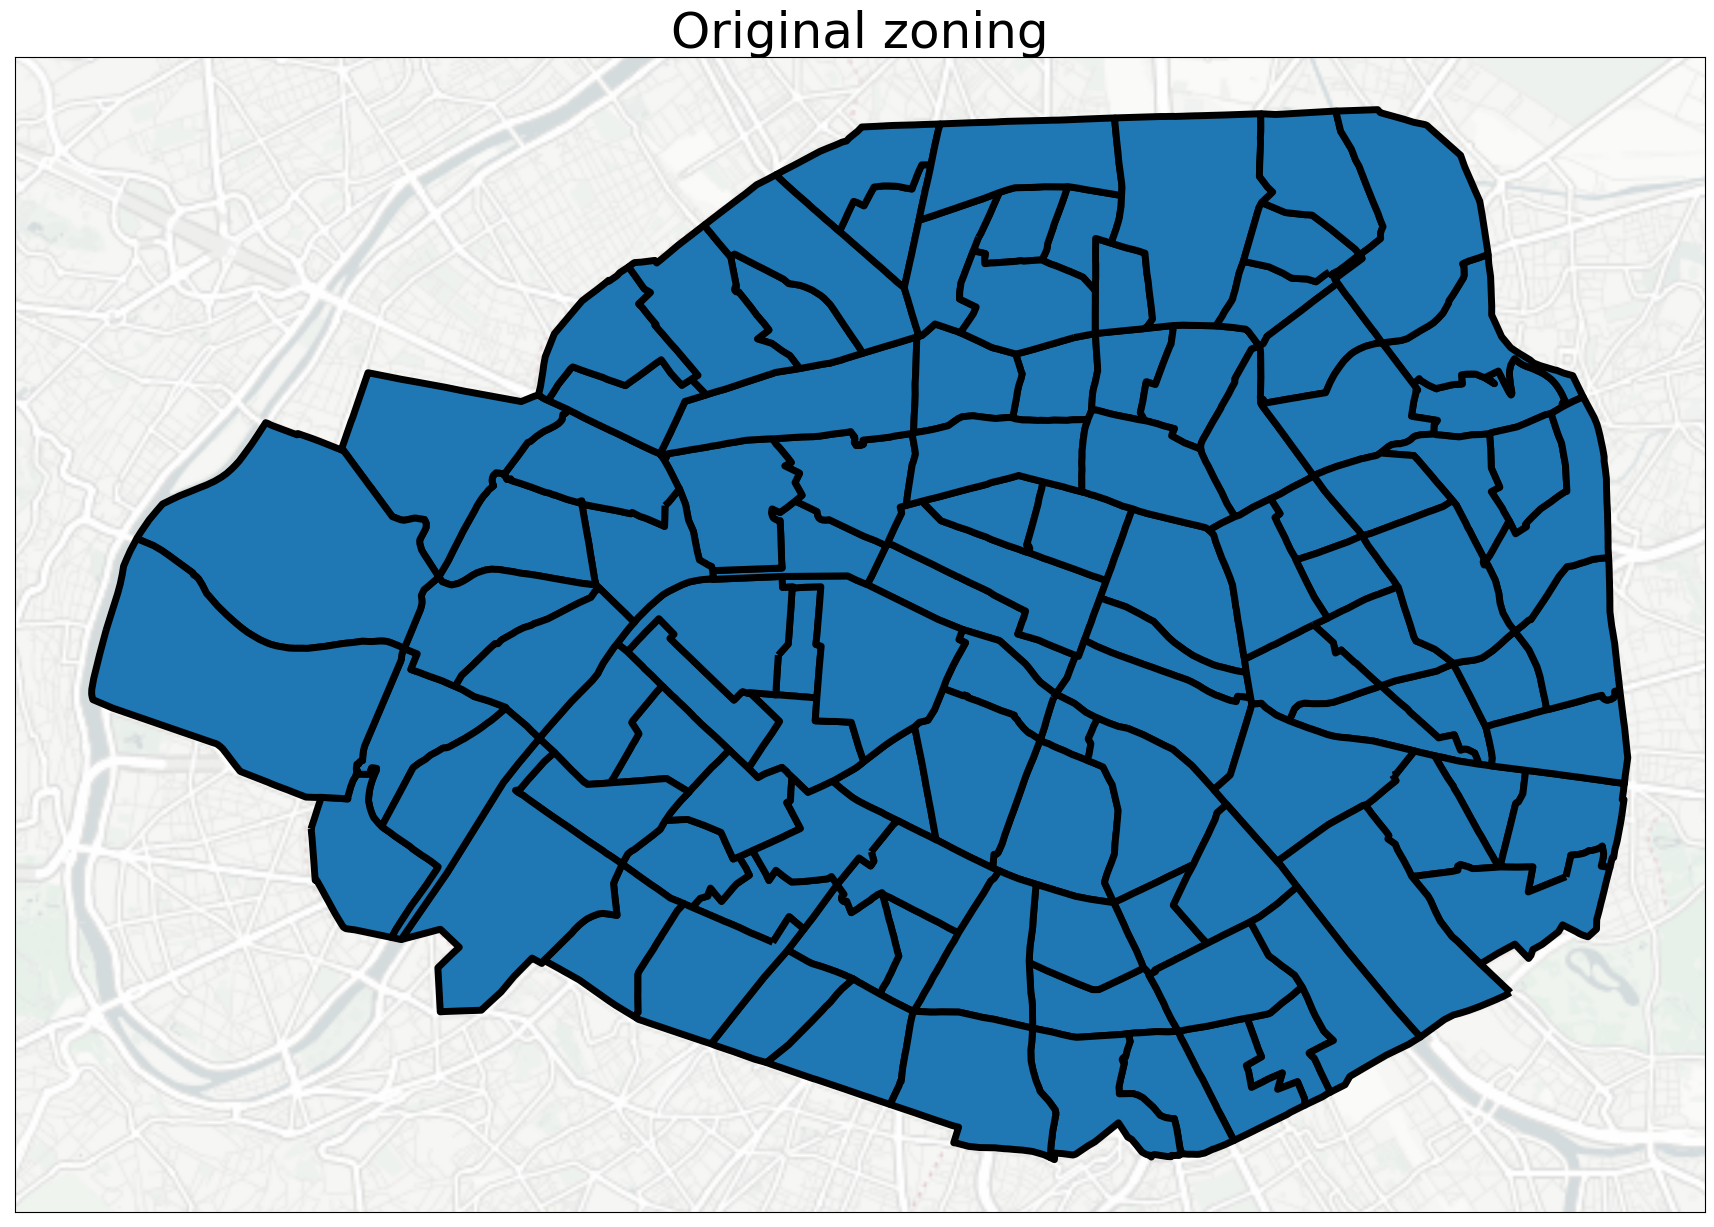

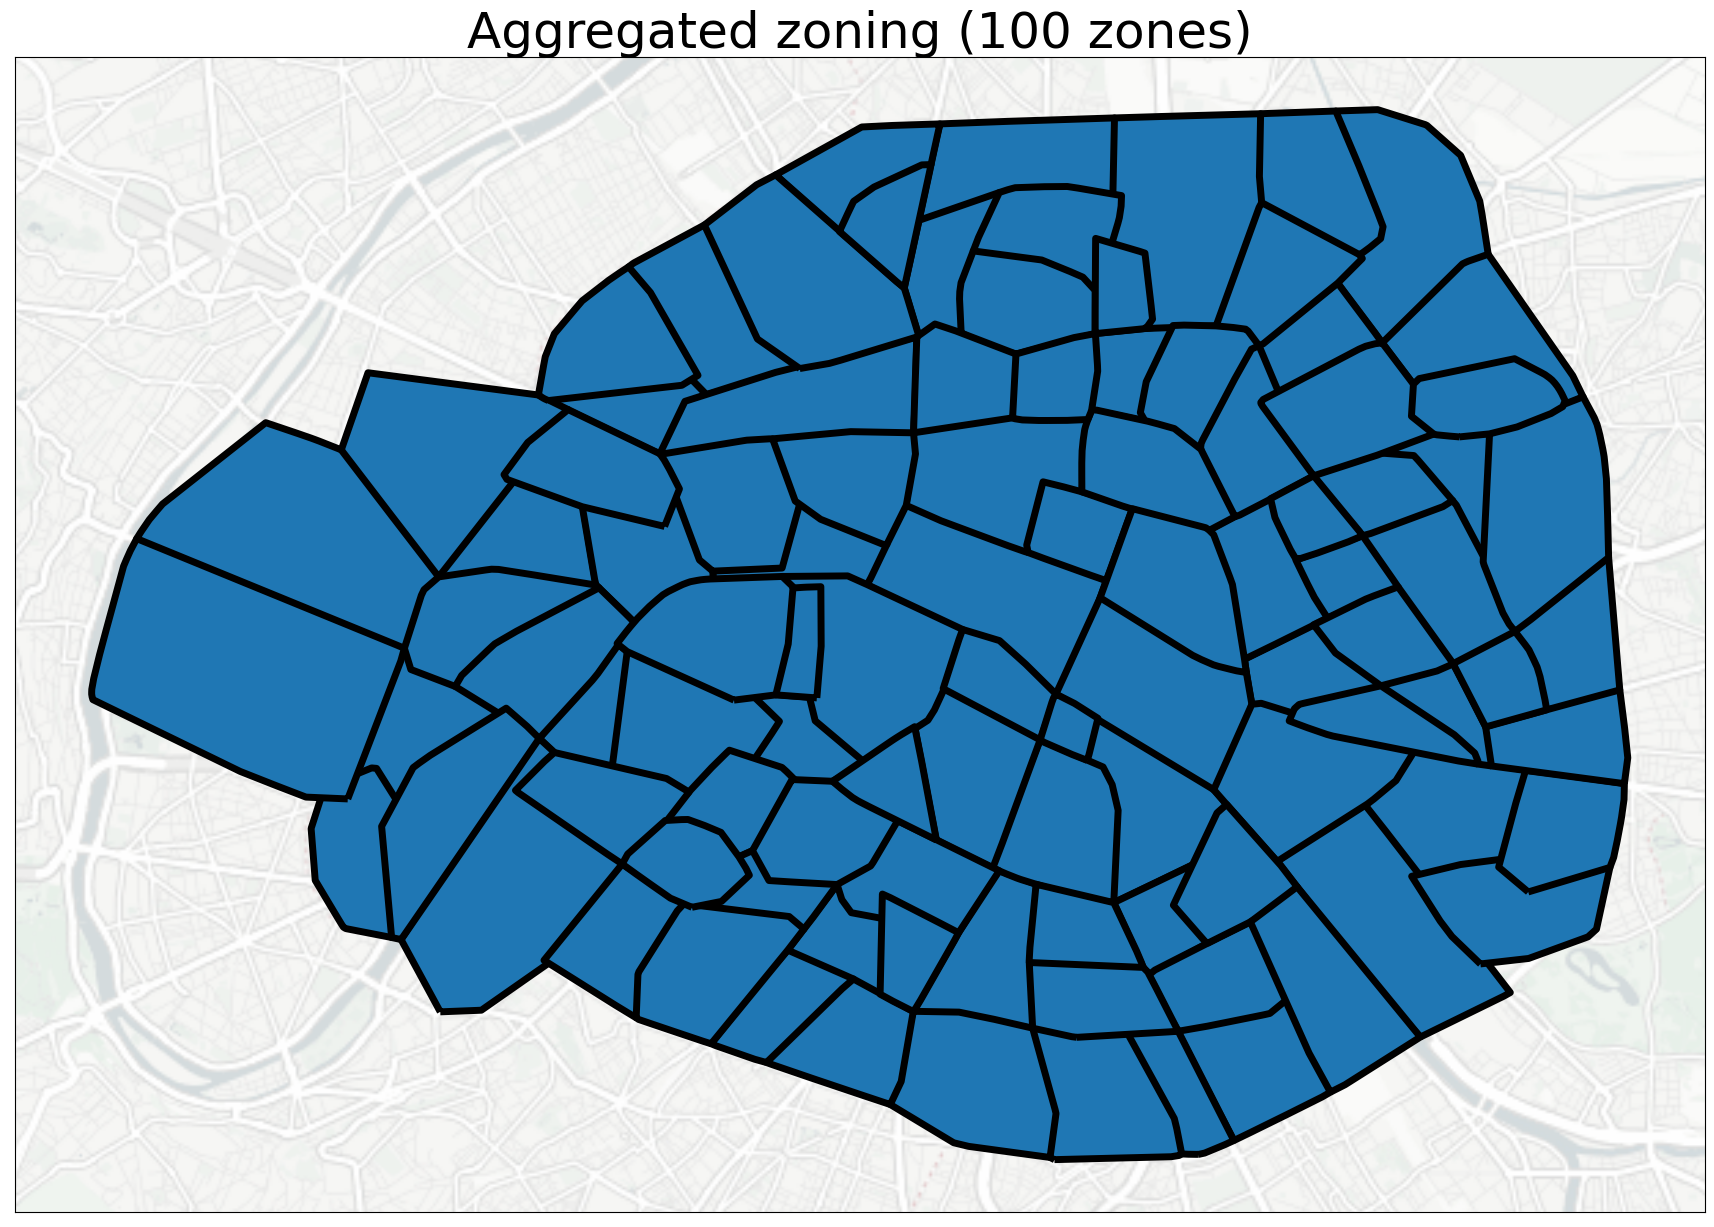

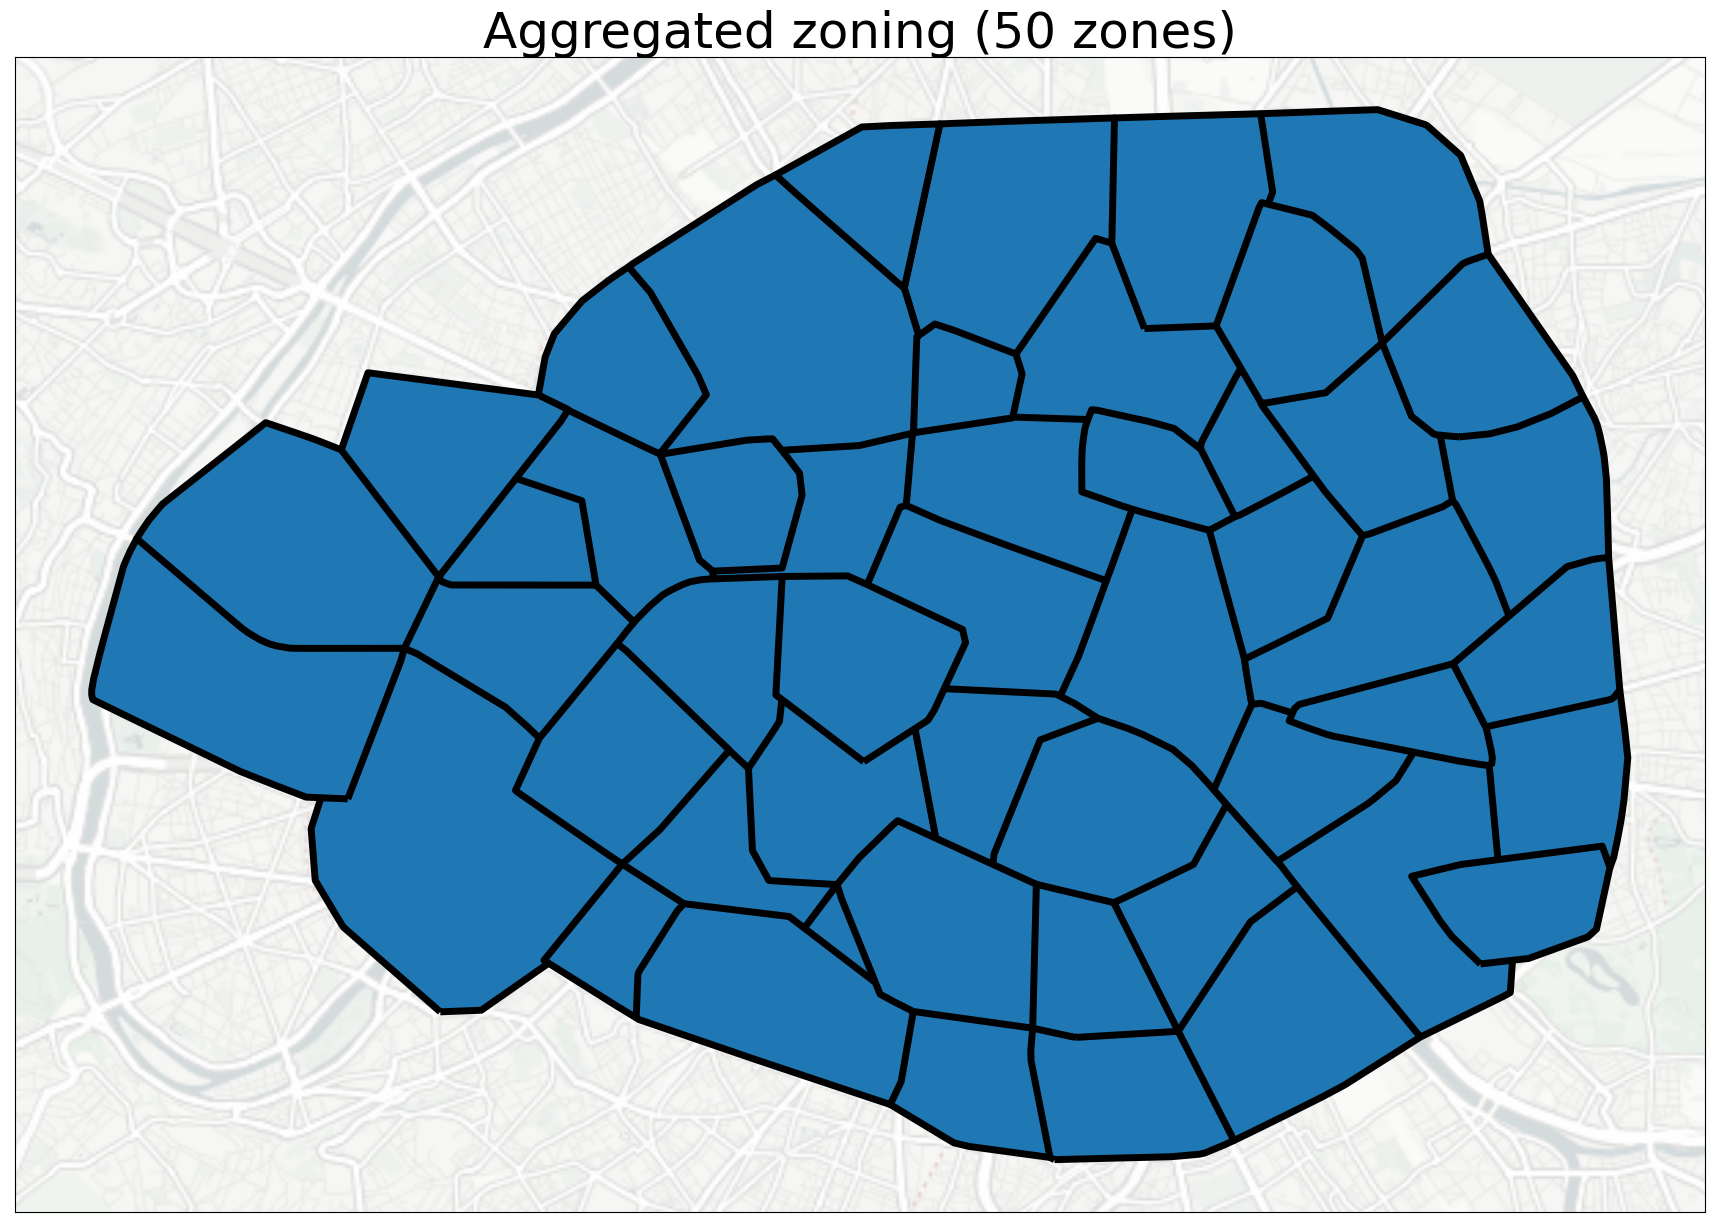

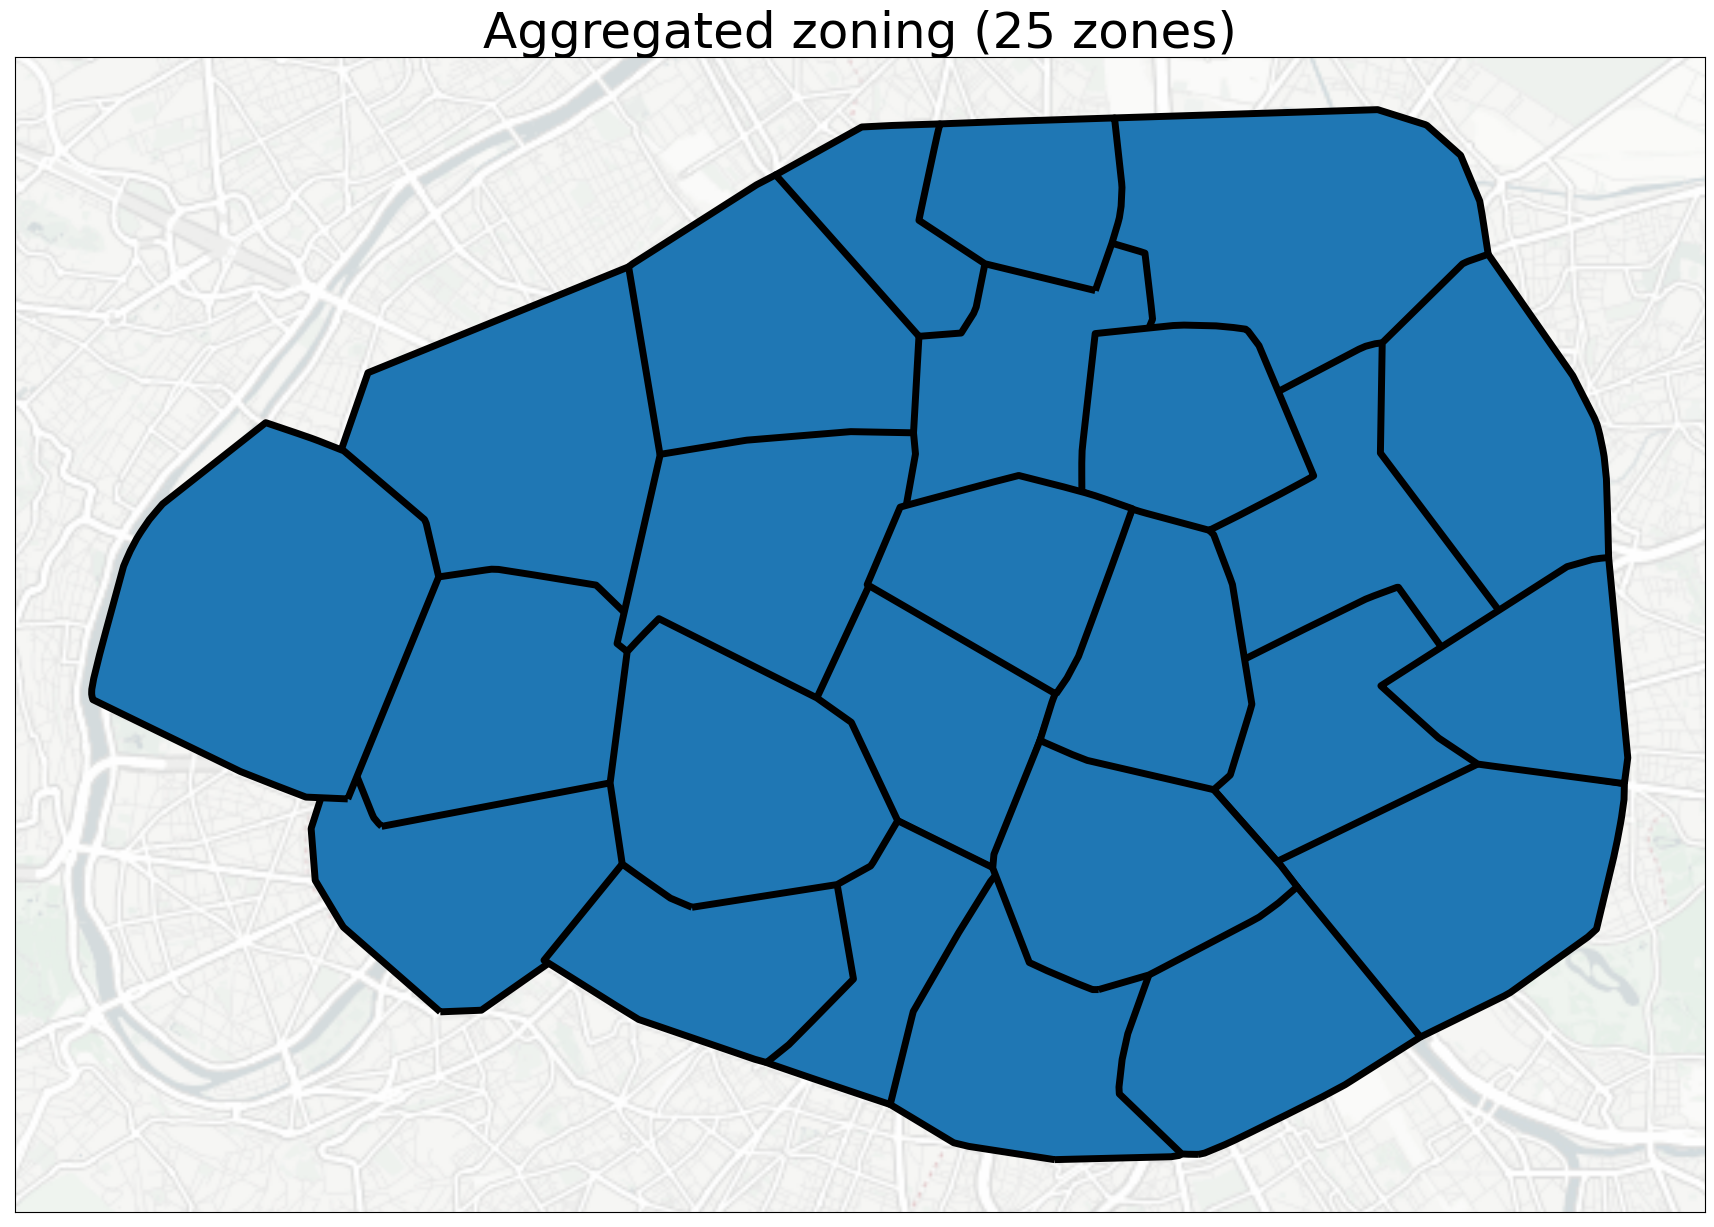

In [8]:
plot = gpd.GeoDataFrame(sm.zones).plot(figsize=[25, 15], edgecolor='black', linewidth=5)
add_basemap(plot, url=url, zoom=12)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Original zoning", fontsize=36)
fig = plot.get_figure()
fig.savefig(plot_path+'zones_a.png', bbox_inches='tight')

a, b = spatial.zone_clusters(sm.zones, n_clusters=100)
plot = gpd.GeoDataFrame(a).plot(figsize=[25, 15], edgecolor='black', linewidth=5)
add_basemap(plot, url=url, zoom=12)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Aggregated zoning (100 zones)", fontsize=36)
fig = plot.get_figure()
fig.savefig(plot_path+'zones_b.png', bbox_inches='tight')

a, b = spatial.zone_clusters(sm.zones, n_clusters=50)
plot = gpd.GeoDataFrame(a).plot(figsize=[25, 15], edgecolor='black', linewidth=5)
add_basemap(plot, url=url, zoom=12)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Aggregated zoning (50 zones)", fontsize=36)
fig = plot.get_figure()
fig.savefig(plot_path+'zones_c.png', bbox_inches='tight')

a, b = spatial.zone_clusters(sm.zones, n_clusters=25)
plot = gpd.GeoDataFrame(a).plot(figsize=[25, 15], edgecolor='black', linewidth=5)
add_basemap(plot, url=url, zoom=12)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Aggregated zoning (25 zones)", fontsize=36)
fig = plot.get_figure()
fig.savefig(plot_path+'zones_d.png', bbox_inches='tight')